<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Juliman !

Perkenalkan saya Code Reviewers, disini saya akan mereview tugas Juliman ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Juliman dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

**Deskripsi tugas**

Perusahaan taksi bernama Sweet Lift telah mengumpulkan data historis tentang pesanan taksi di bandara. Untuk menarik lebih banyak pengemudi pada jam sibuk, perlu memprediksi jumlah pesanan taksi untuk satu jam berikutnya. Buat model untuk prediksi seperti itu.

Metrik RMSE pada *test set* tidak boleh lebih dari 48.

**Instruksi tugas**

1. Unduh data dan lakukan *resampling* dalam satu jam.
2. Analisis datanya.
3.  Latih model yang berbeda dengan hiperparameter yang berbeda pula. Sampel tes harus 10% dari *dataset* awal.
4. Uji data menggunakan sampel tes dan berikan kesimpulan.

**Deskripsi data**

Data tersimpan di file `taxi.csv`. Jumlah pesanan di kolom'*num_orders*'.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

In [1]:
# Load libraries
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn for visualization
import seaborn as sns
sns.set_style("darkgrid")

# Load sklearn
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC

# Load other ml models 
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None, 'display.max_columns', None)

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# Persiapan

## Ikhtisar Data

In [2]:
# Load data
df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

In [3]:
# Sample data
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [4]:
# Informasi Data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


**Kesimpulan Ikhtisar Data**
1. Ada 26496 baris dengan 1 fitur dan 1 target.
2. Data diambil selama 6 bulan dari Maret sampai Agustus 2018.
3. Tidak ada nilai yang hilang.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Pra-Pemrosesan Data

**Duplikat**

In [5]:
# Pemeriksaan baris duplikat
df.index.duplicated().sum()

0

**Kronologis Waktu**

In [6]:
# Pengurutan Index
df.sort_index(inplace = True)

In [7]:
# Pemerikasaan kronologis index
df.index.is_monotonic

True

Data tanggal dan waktu telah tersusun secara kronologis

**Resampling**

In [8]:
# Resampling waktu kedalam jumlah 1 Jam
df = df.resample('1H').sum()
# rata-rata diambil per 24 Jam (1 Hari)
df['mean'] = df['num_orders'].rolling(24).mean()
# Standar deviasi diambil per 24 Jam (1 Hari)
df['std'] = df['num_orders'].rolling(24).std()
print(df.shape)
df.head(30)

(4416, 3)


,num_orders,mean,std
datetime,,,
2018-03-01 00:00:00,124,NaN,NaN
2018-03-01 01:00:00,85,NaN,NaN
2018-03-01 02:00:00,71,NaN,NaN
2018-03-01 03:00:00,66,NaN,NaN
2018-03-01 04:00:00,43,NaN,NaN
2018-03-01 05:00:00,6,NaN,NaN
2018-03-01 06:00:00,12,NaN,NaN
2018-03-01 07:00:00,15,NaN,NaN
2018-03-01 08:00:00,34,NaN,NaN


**Kesimpulan Pra-Pemrosesan Data**
1. Tidak ditemukan adanya baris duplikat.
2. Dataset telah tersusun secara kronologis
3. Data diresample menjadi 1 jam sehingga ukurannya menjadi 4416.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# Analisis

In [9]:
# Membuat dataframe baru untuk ekslorasi dan nilai NaN dihapus
eda = df.dropna()
eda.shape

(4393, 3)

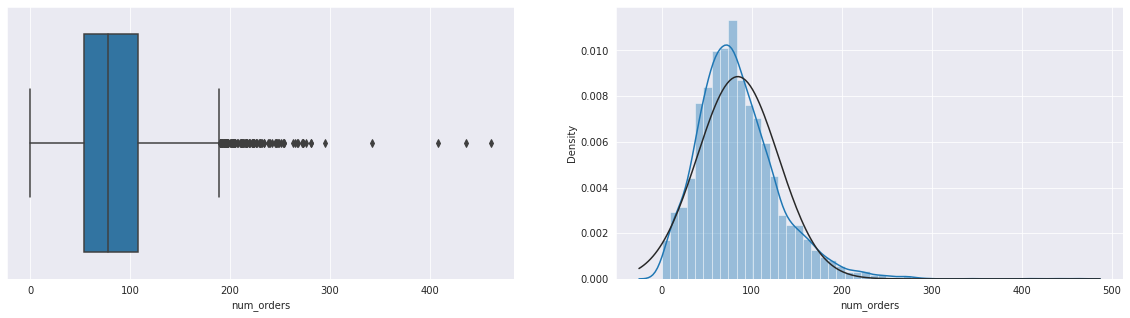

In [10]:
# Plot jumlah pesanan taxi
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(eda["num_orders"], ax=ax[0])
sns.distplot(eda["num_orders"], fit=norm, ax=ax[1])
plt.show();

Terlihat bahwa grafik pesanan taxi berupa distribusi normal dengan beberapa outlier

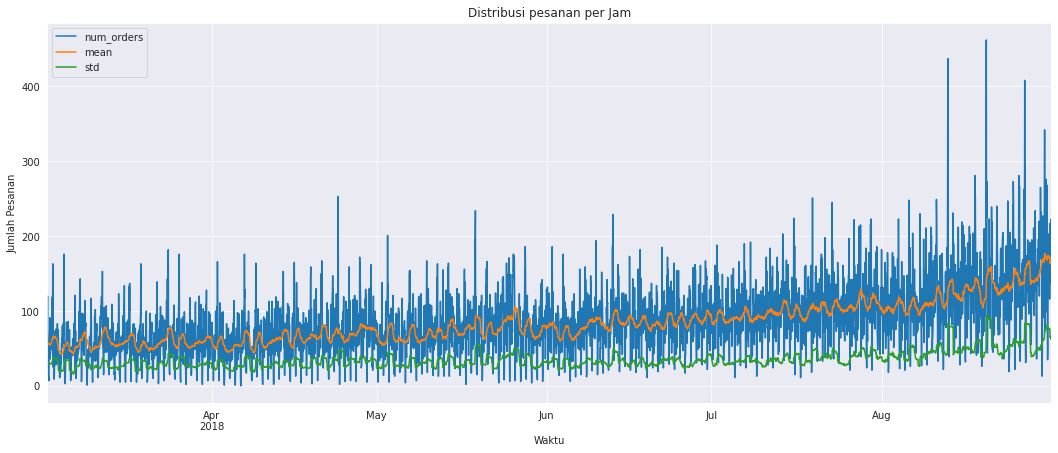

In [11]:
# Distribusi Pesanan per Jam
eda.plot(grid=True,figsize=(18,7));
plt.title('Distribusi pesanan per Jam');
plt.xlabel('Waktu');
plt.ylabel('Jumlah Pesanan');
plt.show();

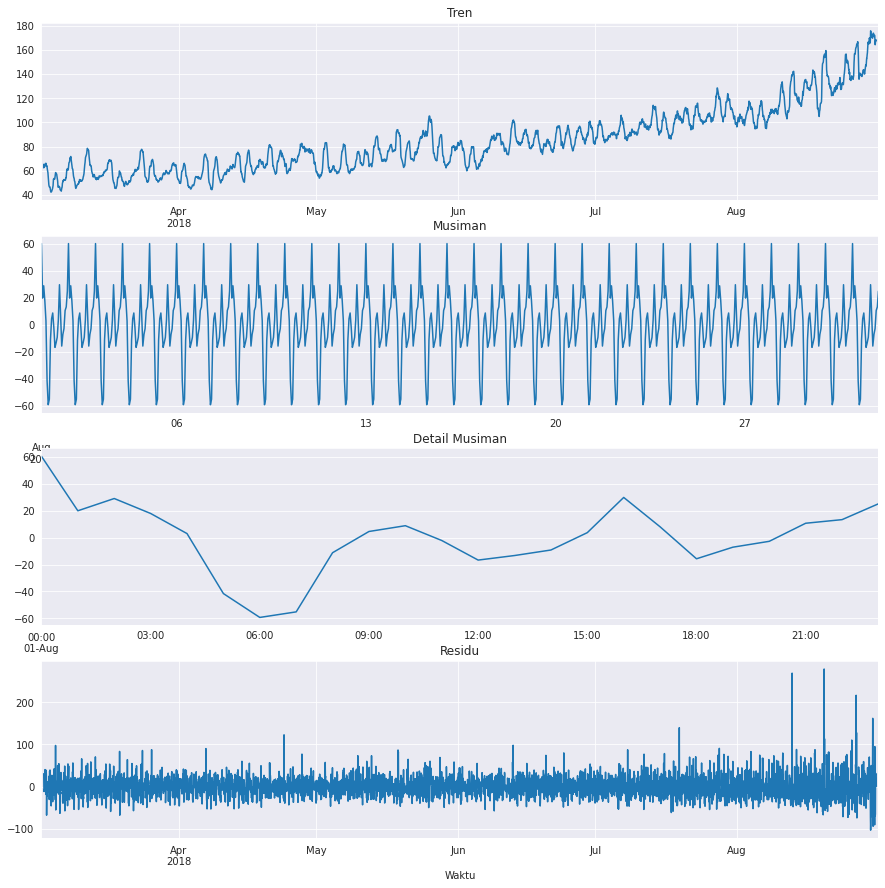

In [12]:
# Grafik Tren, Musiman dan Residu
decomposed = seasonal_decompose(eda['num_orders'])
plt.figure(figsize=(15,15))
plt.subplot(411)
decomposed.trend.plot(ax=plt.gca())
plt.title('Tren')
plt.xlabel('')
plt.subplot(412)
decomposed.seasonal['2018-08-01':'2018-08-31'].plot(ax=plt.gca())
plt.title('Musiman')
plt.xlabel('')
plt.subplot(413)
decomposed.seasonal['2018-08-01':'2018-08-01'].plot(ax=plt.gca())
plt.title('Detail Musiman')
plt.xlabel('')
plt.subplot(414)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residu')
plt.xlabel('Waktu')
plt.show();

**Kesimpulan Analisis Data Eksploratif**
1. Distribusi kolom pesanan berupa distribusi normal dengan beberapa outlier.
2. Standar deviasi terlihat hampir sama, sedangkan rata-rata meningkat hampir 2 kali.
3. Grafik Tren menunjukan peningkatan pesanan di musim panas (Juni - Agustus)
4. Grafik Musiman difilter hanya di bulan Agustus (pesanan terbanyak) agar fluktuasi dapat terlihat dengan jelas. Sepanjang bulan, grafik ini memiliki pola yang sama. Jumlah pesanan tertinggi ada di sekitar pukul 00:00 dan terendah di sekitar pukul 06:00. Puncak berikut nya sekitar pukul 11.00 dan 16.00.
5. Grafik Residu tidak memiliki pola (acak) sesuai yang berasal dari sisa grafik trend dan musiman.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# Pelatihan

## Persiapan Target dan Fitur

**Membagi Dataset**

Sebelum melakukan pelatihan, data dibagi terlebih dahulu menjadi train set dan test set. Sesuai dengan instruksi test set harus 10% dari data awal.
Parameter `shuffle = False` diperlukan agar tetap mempertahankan kronologis data.

In [13]:
# Membagi Dataset
train, test = train_test_split(df, shuffle=False, test_size=0.1)

# Periksa ukuran Dataset
print(df.shape)
print(train.shape)
print(test.shape)

(4416, 3)
(3974, 3)
(442, 3)


Sesuai dengan instruksi ukuran test set 10% dari data awal.

**Prediksi menggunakan Median dari train set untuk mendapatkan RMSE**

In [14]:
# Mengunakan nilai median pada train set sebagai angka konstan untuk mendapatkan RMSE
print('Median dari Pesanan:', test['num_orders'].median())
pred_median = np.ones(test.shape) * train['num_orders'].median()
print('RMSE:', np.sqrt(mean_squared_error(test, pred_median)))

Median dari Pesanan: 135.0
RMSE: 64.45022263463383


**Prediksi menggunakan Nilai Sebelumnya dari train set untuk mendapatkan RMSE**

In [15]:
# Menggunakan nilai sebelumnya untuk memprediksi pesanan dan mendapatkan RMSE
print('Median dari Pesanan:', test['num_orders'].median())
pred_previous = np.ones(test.shape[0]) * test['num_orders'].shift(fill_value=train['num_orders'].iloc[-1])
print('RMSE:', np.sqrt(mean_squared_error(test['num_orders'], pred_previous)))

Median dari Pesanan: 135.0
RMSE: 58.856486242815066


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

**Membuat Fitur**

In [16]:
# Membuat fitur
def make_features(data, max_lag, rolling_mean_size, std_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['week'] = data.index.week
    data['dayofweek'] = data.index.dayofweek
    data['day'] = data.index.day
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
    
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    data['std'] = data['num_orders'].shift().rolling(std_mean_size).mean()
    
make_features(train, 5, 10,10)
train.dropna(inplace=True)
print('Fitur Train')
train.head()

Fitur Train


,num_orders,mean,std,year,month,week,dayofweek,day,hour,lag_1,lag_2,lag_3,lag_4,lag_5,rolling_mean
datetime,,,,,,,,,,,,,,,
2018-03-01 23:00:00,58,56.833333,59.1,2018,3,9,3,1,23,113.0,66.0,61.0,45.0,73.0,59.1
2018-03-02 00:00:00,90,55.416667,61.7,2018,3,9,4,2,0,58.0,113.0,66.0,61.0,45.0,61.7
2018-03-02 01:00:00,120,56.875000,65.9,2018,3,9,4,2,1,90.0,58.0,113.0,66.0,61.0,65.9
2018-03-02 02:00:00,75,57.041667,71.3,2018,3,9,4,2,2,120.0,90.0,58.0,113.0,66.0,71.3
2018-03-02 03:00:00,64,56.958333,74.5,2018,3,9,4,2,3,75.0,120.0,90.0,58.0,113.0,74.5


In [17]:
# Fitur Test
make_features(test, 5, 10,10)
test.dropna(inplace=True)
print('Fitur Test')
train.head()

Fitur Test


,num_orders,mean,std,year,month,week,dayofweek,day,hour,lag_1,lag_2,lag_3,lag_4,lag_5,rolling_mean
datetime,,,,,,,,,,,,,,,
2018-03-01 23:00:00,58,56.833333,59.1,2018,3,9,3,1,23,113.0,66.0,61.0,45.0,73.0,59.1
2018-03-02 00:00:00,90,55.416667,61.7,2018,3,9,4,2,0,58.0,113.0,66.0,61.0,45.0,61.7
2018-03-02 01:00:00,120,56.875000,65.9,2018,3,9,4,2,1,90.0,58.0,113.0,66.0,61.0,65.9
2018-03-02 02:00:00,75,57.041667,71.3,2018,3,9,4,2,2,120.0,90.0,58.0,113.0,66.0,71.3
2018-03-02 03:00:00,64,56.958333,74.5,2018,3,9,4,2,3,75.0,120.0,90.0,58.0,113.0,74.5


**Target dan Fitur**

In [18]:
# Target dan Fitur pada Train set dan Test set
features_train = train.drop('num_orders', axis=1)
target_train = train['num_orders']
features_test = test.drop('num_orders', axis=1)
target_test = test['num_orders']

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Seleksi Model

**Model Baseline**

In [19]:
#Linear Regression sebagai Baseline(dummy)
model = LinearRegression()
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
predictions_train = model.predict(features_train)
print("MAE for the train set:", mean_absolute_error(predictions_train, target_train))

MAE for the train set: 23.144372655174426


**Membuat Pipeline**

Untuk mengabungkan dan menyederhanakan pelatihan atau pun penerapan model digunakan pipeline dari library scikit-learn

In [20]:
# Membuat pipeline
pipe_dtr = Pipeline([('scaler0', StandardScaler()), ('DecisionTreeRegressor', DecisionTreeRegressor())])

pipe_rfr = Pipeline([('scaler1', StandardScaler()), ('RandomForestRegressor', RandomForestRegressor(n_estimators=100))])

pipe_linear = Pipeline([('scaler2', StandardScaler()), ('LinearRegression(Dummy)', LinearRegression())])

pipe_cat_boost_r = Pipeline([('scaler3', StandardScaler()), ('CatBoostRegressor', CatBoostRegressor(verbose=500))])

pipe_lgbm_r =  Pipeline([('scaler4', StandardScaler()), ('LGBMRegressor', LGBMRegressor())])

pipe_xgb_r = Pipeline([('scaler5', StandardScaler()), ('XGBRegressor', XGBRegressor())])

In [21]:
#Membuat daftar/list pipeline
pipelines = [pipe_dtr, pipe_rfr, pipe_linear, pipe_cat_boost_r, pipe_lgbm_r, pipe_xgb_r]

#Membuat dictionary pipeline
pipe_dict = {pipe_dtr: 'DecisionTreeRegressor', pipe_rfr:'RandomForestRegressor', pipe_linear:'LinearRegression',\
             pipe_cat_boost_r: 'CatBoostRegressor', pipe_lgbm_r: 'LGBMRegressor', pipe_xgb_r:'XGBRegressor'}

In [22]:
#Fungsi untuk perhitungan rmse
def rmse(target,predictions): 
    score = mean_squared_error(target, predictions)
    score = score **0.5
    return score

In [23]:
#Parameter cv harus menggunakan TimeSeriesSplit() agar berdasarakan waktu
tscv = TimeSeriesSplit()

# Mencari nilai cross validation dengan loop di pipeline
rmse = make_scorer(rmse, greater_is_better=False)
for pipe in pipelines:
    print(pipe_dict[pipe])
    print(cross_val_score(pipe, features_train, target_train, scoring = rmse, cv = tscv))

DecisionTreeRegressor
[-30.46044822 -31.02251854 -33.43625701 -37.03643569 -38.84670989]
RandomForestRegressor
[-22.83506684 -22.43840793 -23.85584698 -23.68357495 -29.92069134]
LinearRegression
[-26.87567986 -28.67418227 -29.71645808 -31.36269393 -38.42600689]
CatBoostRegressor
Learning rate set to 0.038351
0:	learn: 29.0891983	total: 49.1ms	remaining: 49s
500:	learn: 8.6039872	total: 1.29s	remaining: 1.29s
999:	learn: 4.5756610	total: 2.54s	remaining: 0us
Learning rate set to 0.042774
0:	learn: 29.7276633	total: 3.13ms	remaining: 3.13s
500:	learn: 10.8192229	total: 1.4s	remaining: 1.39s
999:	learn: 6.9262196	total: 2.78s	remaining: 0us
Learning rate set to 0.045598
0:	learn: 31.4781263	total: 3.38ms	remaining: 3.38s
500:	learn: 12.0772902	total: 1.51s	remaining: 1.5s
999:	learn: 8.4343970	total: 3.1s	remaining: 0us
Learning rate set to 0.047716
0:	learn: 32.6346501	total: 3.7ms	remaining: 3.7s
500:	learn: 13.3773812	total: 1.64s	remaining: 1.63s
999:	learn: 9.8693346	total: 3.37s	rem

Dari hasil diatas, Model yang akan di-tuning adalah **Random Forest**, **Gradient Boosting** dan **Light BGM**.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

**Parameter terbaik untuk Model Random Forest**

In [24]:
# Parameter yang akan diseleksi untuk mendapatkan model terbaik
parameters = {'n_estimators': (110,150,200,230,250,80,300),'max_depth': (7,8,10,12,16,19,25)} 

#Model Grid untuk Random Forest
RF_grid=GridSearchCV(RandomForestRegressor(random_state=0,criterion='mse'),param_grid=parameters, cv=tscv, scoring=rmse,
                     n_jobs=-1)
RF_grid_model = RF_grid.fit(features_train, target_train)
print(RF_grid_model.best_estimator_)
print(RF_grid_model.best_score_)

RandomForestRegressor(max_depth=16, n_estimators=110, random_state=0)
-24.46775583720593


**Parameter terbaik untuk Model Gradient Boosting**

In [34]:
# Parameter yang akan diseleksi untuk mendapatkan model terbaik
parameters = {'learning_rate': (0.1,0.2,0.3,0.05),'n_estimators': (200,350,450,150,100,120),
              'base_score': (0.25, 0.5, 0.75)} 

#Model Grid untuk Gradient Boosting
XGB_grid = GridSearchCV(XGBRegressor(), param_grid=parameters, cv=tscv, scoring=rmse, n_jobs=-1) 
XGB_grid_model = XGB_grid.fit(features_train, target_train)
print(XGB_grid_model.best_estimator_)
print(XGB_grid_model.best_score_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
-25.12128087699864


**Parameter terbaik untuk Model Light BGM**

In [28]:
# Parameter yang akan diseleksi untuk mendapatkan model terbaik
parameters = {'learning_rate': (0.05,0.04,0.03,0.02,0.06,0.07,0.08),'n_estimators': (200,350,450,150,100,120)} 

#Model Grid untuk Light BGM
LGBM_grid = GridSearchCV(LGBMRegressor(), param_grid=parameters, cv=tscv, scoring=rmse, n_jobs=1) 
LGBM_grid_model = LGBM_grid.fit(features_train, target_train)
print(LGBM_grid_model.best_estimator_)
print(LGBM_grid_model.best_score_)

LGBMRegressor(learning_rate=0.03, n_estimators=200)
-24.334259970854166


## Implementasi Model Terbaik pada Test Set

Nilai RMSE terbaik ada pada Model Gradient Boosting, karena itu model ini akan diterapakan pada Test Set.

In [36]:
model = Pipeline([('scaler2', StandardScaler()),
        ('XGBRegressor', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None))])
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
print('Model RMSE untuk test set:', mean_squared_error(predictions_test, target_test)**0.5)

Model RMSE untuk test set: 47.53571198771476


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# Kesimpulan

Tujuan dari proyek ini adalah membuat model untuk memprediksi jumlah pesanan untuk 1 jam berikutnya dengan syarat metrik RMSE pada test set tidak boleh lebih dari 48. Dari Nilai score validation dipilih tiga model yang akan di-tuning yaitu : Random Forest, Light BGM dan Gradient Booster. Dari hasil RMSE didapatkan Gradient Booster sebagai model yang terbaik dengan hyperparameternya. Model ini diterapkan pada Train Set dengan Nilai RMSE 47.53 yang telah melewati syarat

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# Daftar Periksa Penilaian

- [x]  Jupyter Notebook bisa dibuka.
- [ ]  Tidak ada kesalahan dalam kode
- [ ]  Sel-sel dengan kode telah disusun berdasarkan urutan eksekusi.
- [ ]  Data telah diunduh dan disiapkan
- [ ]  Data telah dianalisis
- [ ]  Model sudah dilatih dan hiperparameter sudah dipilih
- [ ]  Model sudah dievaluasi. Kesimpulan sudah ada.
- [ ] *RMSE* untuk *test set* tidak lebih dari 48